In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
iris=load_iris()

In [9]:
X=iris.data

In [12]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

k = 2 | Inertia = 222.36 | Silhouette Score = 0.5818
k = 3 | Inertia = 139.82 | Silhouette Score = 0.4599
k = 4 | Inertia = 114.09 | Silhouette Score = 0.3869
k = 5 | Inertia = 90.93 | Silhouette Score = 0.3459
k = 6 | Inertia = 81.54 | Silhouette Score = 0.3171


C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

k = 7 | Inertia = 72.63 | Silhouette Score = 0.3202
k = 8 | Inertia = 62.54 | Silhouette Score = 0.3387
k = 9 | Inertia = 55.12 | Silhouette Score = 0.3424
k = 10 | Inertia = 47.39 | Silhouette Score = 0.3518


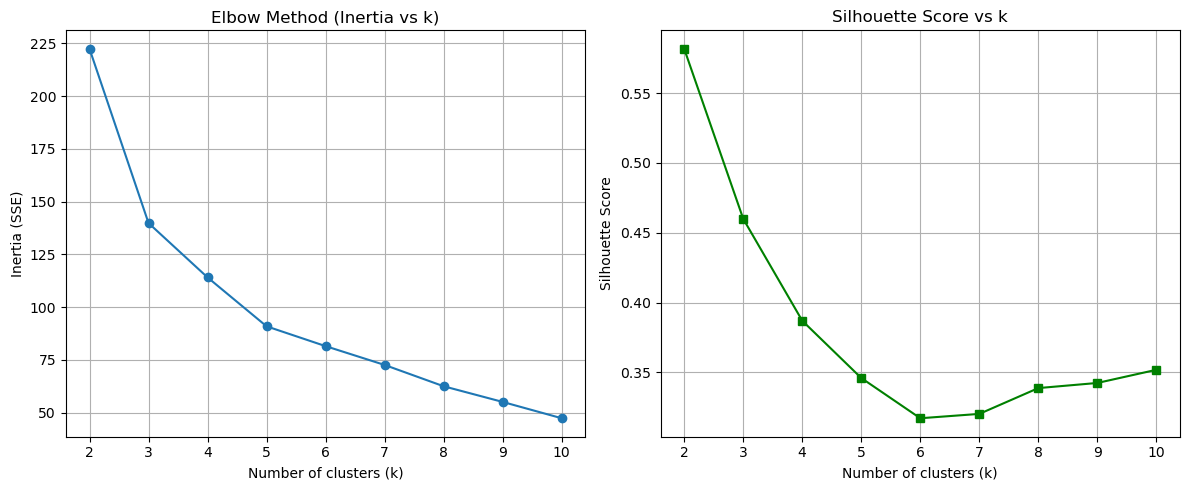

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow + Silhouette method
inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    inertia = kmeans.inertia_
    labels = kmeans.labels_
    sil = silhouette_score(X_scaled, labels)
    
    inertias.append(inertia)
    sil_scores.append(sil)

    print(f"k = {k} | Inertia = {inertia:.2f} | Silhouette Score = {sil:.4f}")

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method (Inertia vs k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, marker='s', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\aeswa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for k=2: 0.5818


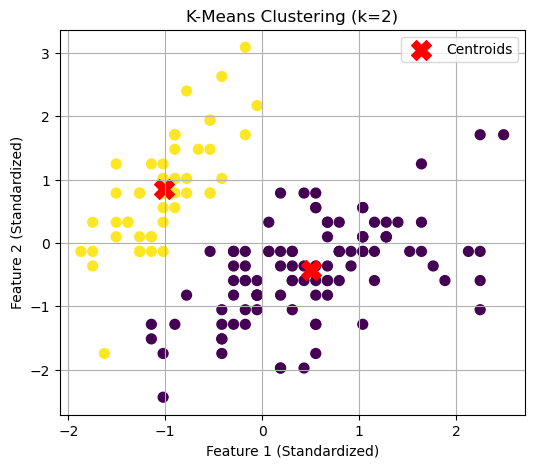

In [25]:
# Step 6: Choose optimal k (let's say we select k=3 from the plots)
optimal_k = 2
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)

# Step 7: Print Silhouette Score for final clustering
final_sil_score = silhouette_score(X_scaled, labels_final)
print(f"Silhouette Score for k={optimal_k}: {final_sil_score:.4f}")

# Step 8: Visualize Final Clusters using 2 features
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_final, cmap='viridis', s=50)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            marker='X', s=200, c='red', label='Centroids')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()